In [124]:
from IPython.display import clear_output

!pip install qiskit
!pip install qiskit_aer
!pip install pylatexenc
!pip install pandas

clear_output()
print("All dependencies installed successfully. Environment ready.")

All dependencies installed successfully. Environment ready.


In [125]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import pandas as pd

In [126]:
def create_bell_pair(qc, a, b):
    qc.h(a)
    qc.cx(a, b)
    return qc

In [127]:
def teleportation():
  qc = QuantumCircuit(3, 3)

  qc = create_bell_pair(qc, 1, 2)
  qc.barrier()

  qc.cx(0, 1)
  qc.h(0)
  qc.barrier()

  qc.measure([0, 1], [0, 1])

  qc.barrier()

  with qc.if_test((1,1)):
    qc.x(2)
  with qc.if_test((0,1)):
    qc.z(2)

  return qc

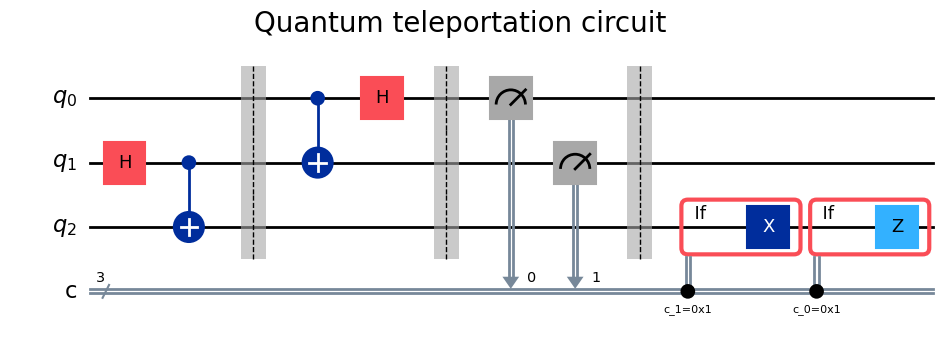

In [128]:
teleport_circuit = teleportation()

fig = teleport_circuit.draw(output="mpl")
fig.suptitle("Quantum teleportation circuit", fontsize=20)
display(fig)

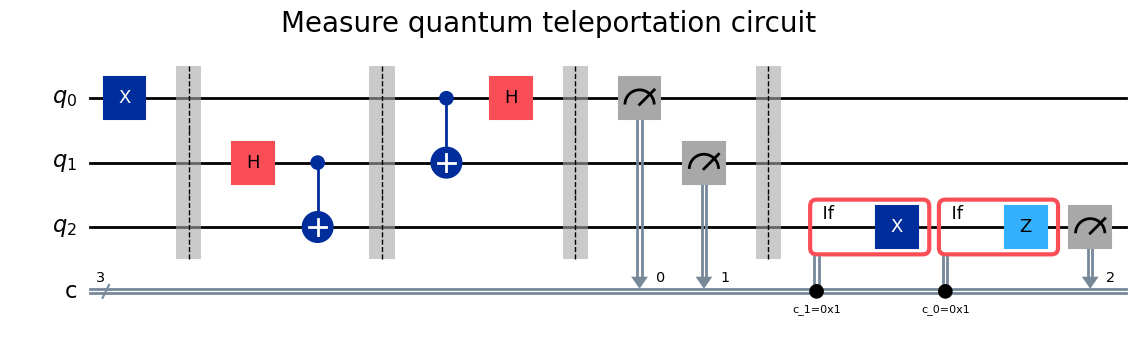

In [129]:
init_qc = QuantumCircuit(3, 3)
init_qc.x(0)
init_qc.barrier()

teleport_circuit = teleportation()

final_qc = init_qc.compose(teleport_circuit)
final_qc.measure(2,2)

fig = final_qc.draw(output="mpl")
fig.suptitle("Measure quantum teleportation circuit ", fontsize=20)
display(fig)

States,101,100,111,110
Frequency,251,260,253,260


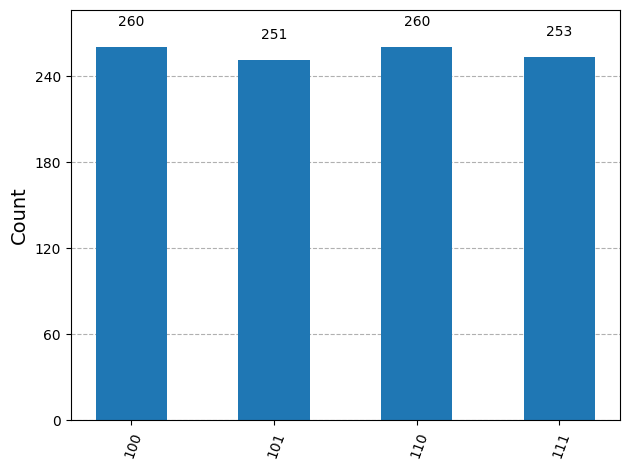

In [130]:
simulator = AerSimulator()
result = simulator.run(final_qc, shots=1024).result()

counts = result.get_counts()

df = pd.DataFrame([counts])
df.index = ["Frequency"]
df.columns.name = "States"

styled_df = df.style\
    .set_caption("Teleportation Measurement Results")\
    .set_properties(**{'text-align': 'center', 'font-size': '12pt'})\
    .set_table_styles([
        {'selector': 'th.col_heading', 'props': [('text-align', 'center'), ('font-size', '12pt')]},
        {'selector': 'th.row_heading', 'props': [('text-align', 'right'), ('font-weight', 'bold')]}
    ])
display(styled_df)

print("\n")
display(plot_histogram(counts))